# Predicting Energy output of Engine Using Regression
We will be using all the regression techniques to predict the output of PE value from the dataset.

The dataset is cleaned and have no categorical or null values

## Importing the libraries

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [94]:
df = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [95]:
y = y.reshape(len(y),1)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Multiple Linear Regression model

In [100]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [101]:
# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


In [102]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9325315554761303

## Polynomial Linear Regression

In [103]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [104]:
y_pred = sc_y.inverse_transform(regressor.predict(poly_reg.transform(sc_X.transform(X_test))))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.19 431.23]
 [457.78 460.01]
 [460.48 461.14]
 ...
 [469.49 473.26]
 [438.39 438.  ]
 [461.55 463.28]]


In [105]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9459040420184243

## Support Vector Regression

In [106]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [107]:
# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


In [108]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.948078404998626

## Decision Tree

In [109]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [110]:
# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.37 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.55 463.28]]


In [111]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.924689987529388

## Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [115]:
# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.65 431.23]
 [457.61 460.01]
 [463.03 461.14]
 ...
 [469.35 473.26]
 [439.4  438.  ]
 [460.19 463.28]]


In [116]:
# Evaluating the Model Performance Metrics
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9615546203700152


As we can see that Random Forest outperforms all the other regressors.

Now we will plot the residuals and errors for the test sets and then evaluate the error metrics for Random Forest

## Visualising the Test set results

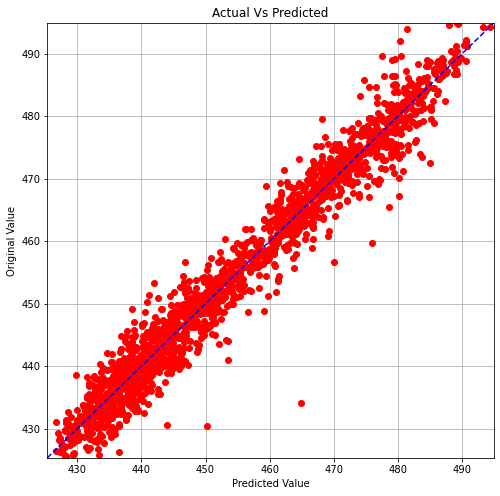

In [67]:
plt.figure(figsize=(8,8))
plt.plot(y_pred,y_test,'ro',label='Trained Model')
plt.xlabel('Predicted Value')
plt.ylabel('Original Value')
plt.grid()
plt.title('Actual Vs Predicted')

y_min = min(min(y_test), min(y_pred))
y_max = max(max(y_test), max(y_pred))

plt.xlim([y_min, y_max])
plt.ylim([y_min, y_max])

# plotting the regression line
plt.plot([y_min, y_max], [y_min, y_max], 'b--')

No handles with labels found to put in legend.


Text(0, 0.5, 'Energy Output')

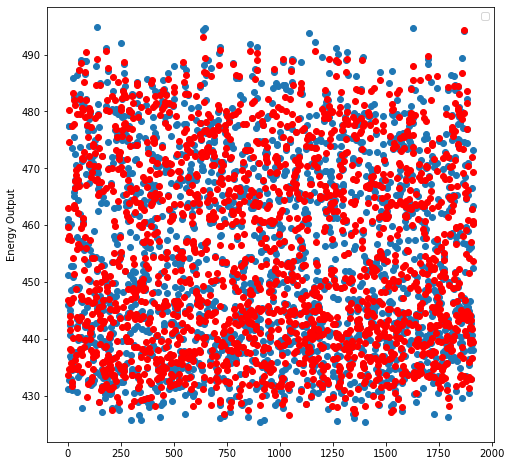

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0, len(y_test)), y_test)
plt.scatter(np.arange(0, len(y_pred)), y_pred, color = 'red')
plt.legend()
plt.ylabel("Energy Output")

<AxesSubplot:ylabel='Density'>

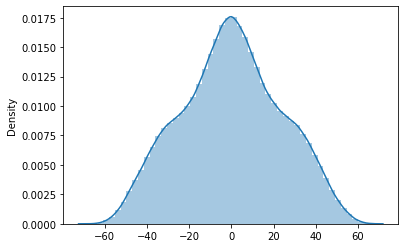

In [121]:
# plotting the residuals
sns.distplot(y_test - y_pred)
# plt.xlim(min(y_test), max(y_test))

In [118]:
# all metrices 
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred)
AdjR2 = 1-(1-R2)*(1197-1)/(1197-7-1)

print("Randome Forest Regressor")

print('MAE   = ', MAE)
print('MSE   = ', MSE)
print('RMSE  = ', RMSE)
print('R2    =', R2 )
print('AdjR2 =', AdjR2)

Randome Forest Regressor
MAE   =  2.4524320794148395
MSE   =  11.244805873040761
RMSE  =  3.3533275821250688
R2    = 0.9615546203700152
AdjR2 = 0.9613282808768193
